In [56]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.figure import Figure
from functools import reduce
from pathlib import Path

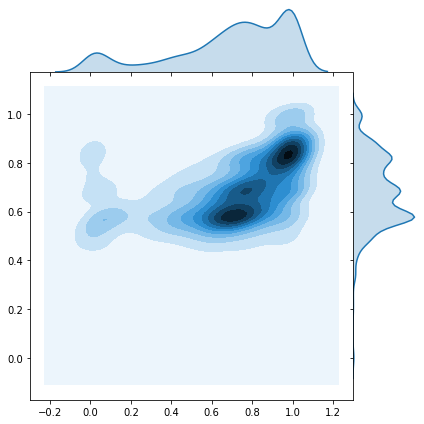

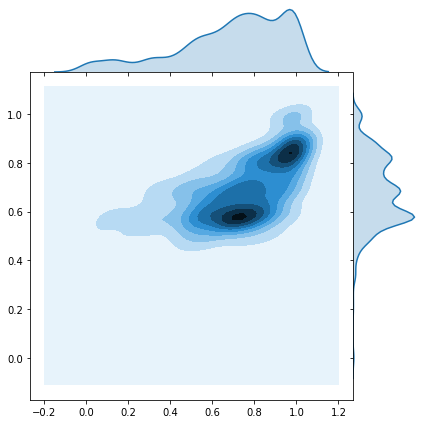

In [60]:
projectdir = Path('/code')
fnames = [
    'output/1124_eddkt_vs_dkt/20191124-1843_eddkt_ef15_eddkt/pa_relation/eddkt_xy.pkl',
#     'output/1124_eddkt_vs_dkt/20191124-1843_eddkt_ef15_w1w2_eddkt/pa_relation/eddkt_xy.pkl',
#     'output/1124_eddkt_vs_dkt/20191124-1856_dkt_dkt/pa_relation/dkt_xy.pkl',
#     'output/1124_eddkt_vs_dkt/20191124-1856_dkt_w1w2_dkt/pa_relation/dkt_xy.pkl',

#     'output/1124_geddkt/20191125-0159_ef5_geddkt/pa_relation/geddkt_xy.pkl',
#     'output/1124_geddkt/20191125-0239_ef10_geddkt/pa_relation/geddkt_xy.pkl',
    'output/1124_geddkt/20191125-0335_ef15_geddkt/pa_relation/geddkt_xy.pkl',
]
for fname in fnames:
    with open(projectdir / fname, 'rb') as f:
        data = pickle.load(f)

#     plt.figure()
#     sns.jointplot(data[0], data[1], kind="hex", color="#4CB391")
    sns.jointplot(data[0], data[1], kind="kde", space=0)
#     plt.axis('equal')
#     plt.xlim((0,1))
#     plt.ylim((0,1))
    plt.show()

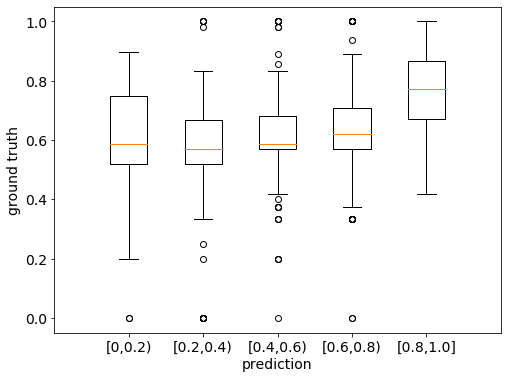

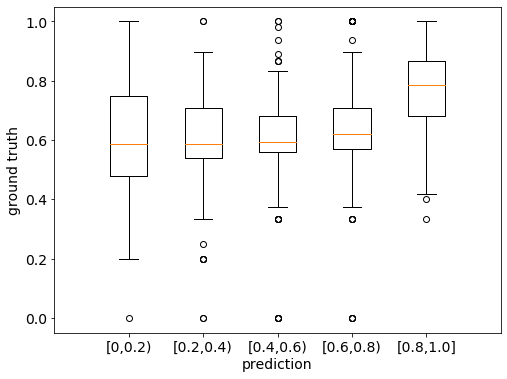

In [61]:
binNum = 5

def val2label(val):
    return np.min((np.int(np.floor(val * binNum)), binNum - 1))

def classifyByLabel(classifiedList, newPair):
    pred, truth = newPair
    label = val2label(pred)
    classifiedList[label].append(truth)
    return classifiedList

for fname in fnames:
    with open(projectdir / fname, 'rb') as f:
        data = pickle.load(f)

    emptyLists = [[] for _ in range(binNum)]
    classifiedL = reduce(classifyByLabel, np.array(data).transpose(), emptyLists)

    fig, ax = plt.subplots(figsize=(8,6))
    ax.boxplot(np.array(classifiedL))
    ax.set_xlim((0, 6))
    ax.set_xlabel('prediction', fontsize=14)
    ax.set_ylabel('ground truth', fontsize=14)
    xticks = plt.xticks([1,2,3,4,5], ('[0,0.2)', '[0.2,0.4)', '[0.4,0.6)', '[0.6,0.8)', '[0.8,1.0]'), fontsize=14)
    yticks = plt.yticks(fontsize=14)
    plt.show()

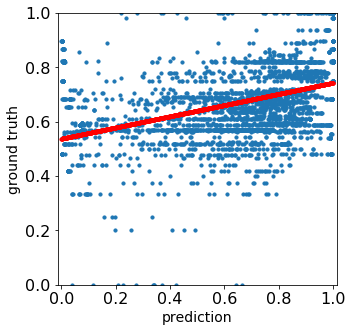

0.1320, coef: [0.20597607]


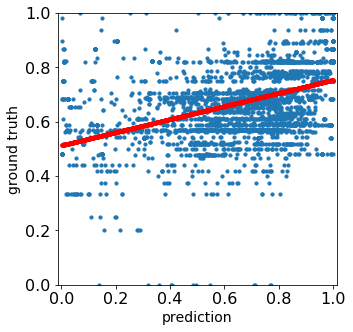

0.1311, coef: [0.24096575]


In [62]:
from sklearn import linear_model

for fname in fnames:
    with open(projectdir / fname, 'rb') as f:
        data = pickle.load(f)

    x, y = np.array(data[0]), np.array(data[1])
    lr = linear_model.LinearRegression()
    lr.fit(x.reshape((-1,1)), y)
    x_test = np.linspace(x.min(), x.max(), 1000)
    y_lr = lr.predict(x_test.reshape((-1,1)))

    plt.figure(figsize=(5,5))
    plt.scatter(x, y, s=10)
    plt.scatter(x_test, y_lr, color='red', s=10)
    plt.axis('equal')
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.xlabel('prediction', fontsize=14)
    plt.ylabel('ground truth', fontsize=14)
    xticks = plt.xticks(fontsize=16)
    yticks = plt.yticks(fontsize=16)
    plt.show()
    
    y_lr = lr.predict(x.reshape((-1,1)))
    rmse = ((y_lr - y) ** 2).mean() ** (1/2)
    print('{:.4f}, coef: {}'.format(rmse, lr.coef_))